<a href="https://colab.research.google.com/github/MMB019/CoursDevops/blob/main/Lab_DIT_IA_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist #importation du datasets

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data() #chargement et affectation des données

X_train.shape,X_test.shape,y_train.shape,y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

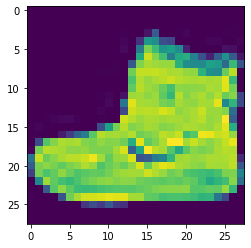

In [ ]:
import matplotlib.pyplot as plt


plt.imshow(X_train[0])
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_enc=to_categorical(y_train,10)
y_test_enc=to_categorical(y_test,10)

x_train=X_train / 255
x_test=X_test /255

x_train_norm=x_train.reshape(x_train.shape[0],28*28)
x_test_norm=x_test.reshape(x_test.shape[0],28*28)

In [ ]:
x_train_norm.shape, y_train.shape, x_test_norm.shape,y_test_enc.shape

((60000, 784), (60000,), (10000, 784), (10000, 10))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Input

In [ ]:
def get_model(input_shape,classes):
  model=Sequential()

  model.add(Input(input_shape))
  model.add(Dense(units=64, activation="relu"))
  model.add(Dense(units=16, activation="relu"))

  model.add(Flatten())

  model.add(Dense(units=120, activation="relu"))
  model.add(Dense(units=84, activation="relu"))
  model.add(Dense(units=classes, activation="softmax"))
  return model


In [ ]:
model=get_model(input_shape=28*28,classes=10)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 120)               2040      
                                                                 
 dense_8 (Dense)             (None, 84)                10164     
                                                                 
 dense_9 (Dense)             (None, 10)                850       
                                                                 
Total params: 64,334
Trainable params: 64,334
Non-trai

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(x_train_norm,y_train_enc,epochs=100,batch_size=64, validation_data=(x_test_norm,y_test_enc))

Epoch 1/100
938/938 [==============================] - 3s 3ms/step - loss: 0.2298 - accuracy: 0.9130 - val_loss: 0.3515 - val_accuracy: 0.8802
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 0.2231 - accuracy: 0.9153 - val_loss: 0.3580 - val_accuracy: 0.8768
Epoch 3/100
938/938 [==============================] - 2s 3ms/step - loss: 0.2201 - accuracy: 0.9167 - val_loss: 0.3517 - val_accuracy: 0.8788
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - loss: 0.2167 - accuracy: 0.9176 - val_loss: 0.3893 - val_accuracy: 0.8762
Epoch 5/100
938/938 [==============================] - 2s 3ms/step - loss: 0.2105 - accuracy: 0.9205 - val_loss: 0.3664 - val_accuracy: 0.8808
Epoch 6/100
938/938 [==============================] - 2s 3ms/step - loss: 0.2060 - accuracy: 0.9212 - val_loss: 0.3559 - val_accuracy: 0.8844
Epoch 7/100
938/938 [==============================] - 2s 3ms/step - loss: 0.2026 - accuracy: 0.9226 - val_loss: 0.3758 - val_accuracy: 0.8831